<a href="https://colab.research.google.com/github/rdeaguiar08/Visualizaci-n-accidente-avion-/blob/main/TP/PEC_4_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418/22.518 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# **PAC 4. Redes Neuronales**

## Introducción

En este ejercicio práctico estudiaremos cómo utilizar las técnicas previamente estudiadas en teoría para la resolución de pueblos prácticos.

Las competencias asociadas a este módulo son las siguientes:

- Que los estudiantes sepan aplicar sus conocimientos a su trabajo o vocación de una forma profesional y posean las competencias que suelen demostrarse por medio de la elaboración y defensa de argumentos y la resolución de problemas dentro de su área de estudio.
- Diseñar y construir aplicaciones analíticas mediante técnicas de desarrollo, integración y reutilización de componentes software.
- Buscar, gestionar y utilizar la información más adecuada para modelizar problemas concretos y aplicar adecuadamente procedimientos teóricos para su resolución de forma autónoma y creativa.

Y los objetivos que perseguimos con este notebook de prácticas son:

- Conocer las distintas partes que forman una red neuronal así como las técnicas de entrenamiento de las mismas.
- Realizar un análisis de los resultados obtenidos con diversas arquitecturas de redes neuronales en problemas de clasificación utilizando las métricas de evaluación comunes para estos problemas.
- Familiarización con librerías de programación de redes neuronales a través de ejemplos.
- Detectar qué tipo de red es la más indicada para un problema concreto. Una vez detectada, implementar la arquitectura usando librerías de aprendizaje profundo.

## Descripción de la PEC

Para ello, en este notebook deberá realizar:

1. Cargar un dataset, analizarlo y prepararlo para entrenar modelos de deep learning.

2. Entrenar una red neuronal con la estrategia de transfer learning por un caso binario.

3. Probar varias configuraciones de entrenamiento.

4. Reflexionar sobre los resultados obtenidos.


Los ejercicios se valorarán de la siguiente forma:

     Ejercicio 1: 1 punto
     Ejercicio 2: 1 punto
     Ejercicio 3: 2 puntos
     Ejercicio 4: 2 puntos
     Ejercicio 5: 2 puntos
     Ejercicio 6: 1 punto
     Ejercicio 7: 1 punto

Cada ejercicio será evaluado teniendo en cuenta tanto la corrección técnica de la solución como la justificación y argumentación del procedimiento y resultados.

Cada ejercicio está dividido en distintos apartados (a, b, c,…). Esta división tiene el objetivo de guiarle en la resolución de la práctica y debe solucionar cada apartado, proporcionando el código y las explicaciones requeridas. Sin embargo, estos apartados no se evaluarán individualmente. Cada ejercicio será evaluado de forma global, por lo que no existe una puntuación específica para cada apartado.


### Clasificación de imágenes

En el campo de la visión por computador existen diferentes tareas que podemos realizar para analizar una imagen. Algunas de estas tareas se muestran en la siguiente figura:

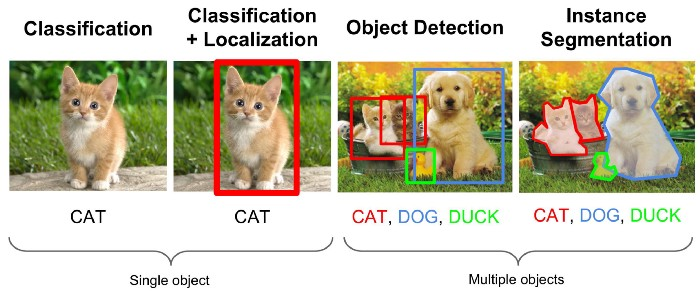

<div style="font-size:3">Fuente de la imagen: https://medium.com/@sidereal/all-you-need-to-know-about-computer-vision-3997bc6318a6 </div>



En esta PEC trabajaremos con la tarea más común: la clasificación de imágenes. El dataset que utilizaremos contiene imágenes de gatos y perros.

Una red neuronal para la clasificación de imágenes tiene como entrada una imagen y como salida un valor por cada clase que queremos predecir.

#### Los datos

Uno de los rasgos más distintivos de las redes neuronales es la necesidad de grandes cantidades de datos para ser entrenadas. Por este motivo, en esta práctica trabajará con el *Oxford III Pet Dataset*, el cual contiene más de 7000 imágenes etiquetadas de gatos y perros. Los datos (*dataset*) originales se encuentran disponibles en el siguiente enlace:

https://www.robots.ox.ac.uk/~vgg/data/pets/

Desafortunadamente, este dataset contiene varios errores y, además, combina imágenes con distintas resoluciones, dificultando su uso. Por este motivo hemos preparado una versión adaptada del dataset que le proporcionamos en el archivo cats_and_dogs.zip.

Por tanto, *no* debe trabajar con el dataset original, sino que debe hacerlo con la versión adaptada que le proporcionamos: cats_and_dogs.zip. Esta versión está compuesta por un reducido número de imágenes en color (RGB) de gatos y perros en formato JPG. Las imágenes son los datos que queremos que nuestra red neuronal aprenda a clasificar como *imagen de un gato* o *imagen de un perro*.

#### Tiempo de entrenamiento

Tened en cuenta que entrenar una red neuronal consume mucho tiempo. Si utilizáis Colab podrá utilizar las GPU de Google de modo que el tiempo de entrenamiento se reducirá significativamente respecto a un entrenamiento sobre CPU. Ahora bien... no esperéis milagros. Aunque el término "GPU de Google" sugiere mucha capacidad de proceso, no es tanta como parece.

Por todos estos motivos los ejercicios propuesto se centran en redes neuronales simples y en entrenamientos pequeños (solo unas pocas épocas o epochs*). Estos entrenamientos pequeños sobre redes neuronales sencillas no os permitirán ver todo el potencial del deep leraning pero sí os darán algunas pistas sobre cómo funcionan las redes neuronales, así como sus ventajas e inconvenientes. Si, una vez terminada la práctica, deseáis repetir todos los entrenamientos durante más épocas (entre 100 y 200 por ejemplo) o deseáis intentar ampliar los modelos sencillos con los que ha trabajado, puede hacerlo (sin que forme parte de la práctica en entregar).

Algunos ejercicios requieren funciones, variables o modelos creados y entrenados en ejercicios anteriores. Si abandonáis la sesión (tanto el local como remotamente con Colab) para continuar más adelante, tendréis que volver a ejecutar todas las celdas. Esto no es problemático salvo para los entrenamientos (ya que tardan tiempo en completarse). Ya que se os pedirá que guardéis modelos entrenados a disco, nuestro consejo es que comprobéis (en vuestro código) si el modelo a entrenar ya existe en el disco y, si es así, lo podéis cargar en lugar de volverlo a entrenar. Podéis hacerlo aunque el ejercicio no lo solicite expresamente.

En relación a lo anterior, recuerdad que los archivos del espacio Colab se pierden al cerrar la sesión. Esto incluye los modelos entrenados que habéis guardado. Para preservarlos podéis utilizar las técnicas mencionadas anteriormente.

**Código de referencia**

Para resolver esta PEC disponéis de los notebooks de la asignatura referentes a este capítulo: 


https://gitlab.uoclabs.uoc.es/aprenentatge_automatic/aprenentatge_automatic/-/tree/master/5_neural_networks_examples


En primer lugar importamos los módulos de Python que necesitaremos:

Si necesitáis importar más durante la PAC, puedes añadirlos aquí

In [1]:
import tensorflow as tf
import os
import numpy as np

import matplotlib.pyplot as plt

**IMPORTANTE:** Cuando trabajamos con la librería de deep learning `keras` debemos asegurarnos de que estamos utilizando una instancia de Colab de tipo "GPU". Si no el entrenamiento de nuestras redes será hasta 10 veces más lento.

Para cambiar el tipo de instancia de Colab vaya al menú superior "Runtime" -> "Change Runtime Type" -> "GPU".

In [2]:
print('Check GPU runtime type... ')
if len(tf.config.list_physical_devices('GPU')) == 0:
  print('Change Runtype Type in top menu for GPU acceleration')
else:
  print('OK!')

Check GPU runtime type... 
OK!




**Carga del dataset**. Cargue el dataset cats_and_dogs.zip proporiconado en la práctica. Puede subirlo a la sesión manualmente o guardarlo en su drive y conectarlo con colab de la siguiente manera:


```
from google.colab import drive
drive.mount('/content/drive')
```

Se recomienda hacerlo en el drive ya que los datos se cargan más rápidamente y no es necesario volver a hacerlo una vez se reinicia la sesión


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Si ha guardado los datos en la base de su drive los podrá descomprimir con los pedidos (si no debe modificar el path según corresponda):

In [4]:
cd /content/drive/MyDrive/ciencia_de_los_datos/2022-2023/Aprendizaje_automatico/Pec4

/content/drive/MyDrive/ciencia_de_los_datos/2022-2023/Aprendizaje_automatico/Pec4


In [5]:
#!unzip cats_and_dogs.zip

E ir a la carpeta descomprimida para facilitar la carga de imágenes:

In [6]:
cd cats_and_dogs

/content/drive/MyDrive/ciencia_de_los_datos/2022-2023/Aprendizaje_automatico/Pec4/cats_and_dogs


## EJERCICIO 1: Analiza el dataset.

**Describe los datos de cats_and_dogs. Utiliza las funciones que necesites para:**


**a) Contar el número de archivos en cada dataset**


In [7]:
# Definir las rutas a las carpetas
paths_to_folders = {
    'train_cats': '/content/drive/MyDrive/ciencia_de_los_datos/2022-2023/Aprendizaje_automatico/Pec4/cats_and_dogs/train/cats',
    'train_dogs': '/content/drive/MyDrive/ciencia_de_los_datos/2022-2023/Aprendizaje_automatico/Pec4/cats_and_dogs/train/dogs',
    'test_cats': '/content/drive/MyDrive/ciencia_de_los_datos/2022-2023/Aprendizaje_automatico/Pec4/cats_and_dogs/test/cats',
    'test_dogs': '/content/drive/MyDrive/ciencia_de_los_datos/2022-2023/Aprendizaje_automatico/Pec4/cats_and_dogs/test/dogs',
    'val_cats': '/content/drive/MyDrive/ciencia_de_los_datos/2022-2023/Aprendizaje_automatico/Pec4/cats_and_dogs/val/cats',
    'val_dogs': '/content/drive/MyDrive/ciencia_de_los_datos/2022-2023/Aprendizaje_automatico/Pec4/cats_and_dogs/val/dogs'
}

# Contar el número de archivos en cada carpeta
for folder, path in paths_to_folders.items():
    num_images = len(os.listdir(path))
    print(f"El número de imágenes en {folder} es: {num_images}")

El número de imágenes en train_cats es: 252
El número de imágenes en train_dogs es: 252
El número de imágenes en test_cats es: 36
El número de imágenes en test_dogs es: 36
El número de imágenes en val_cats es: 144
El número de imágenes en val_dogs es: 144


**b) Leer y visualizar algunas imágenes del dataset, analizar el tamaño de las imágenes**

Tamaño de la imagen: (128, 128)


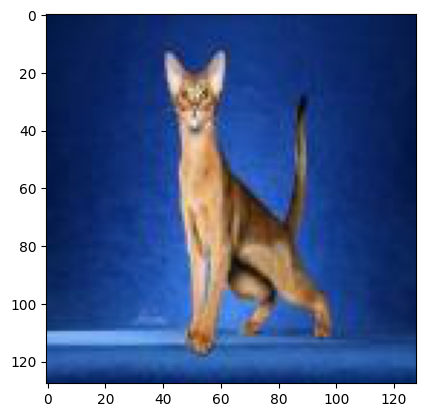

Tamaño de la imagen: (128, 128)


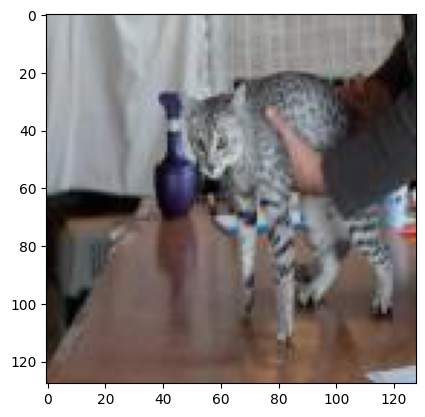

Tamaño de la imagen: (128, 128)


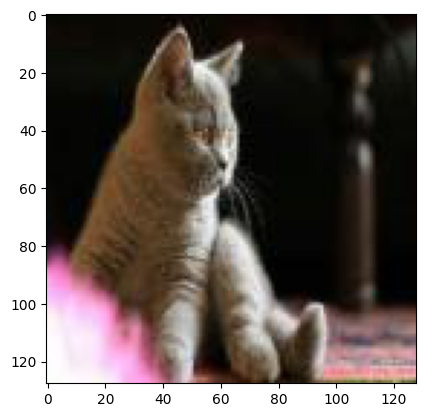

Tamaño de la imagen: (128, 128)


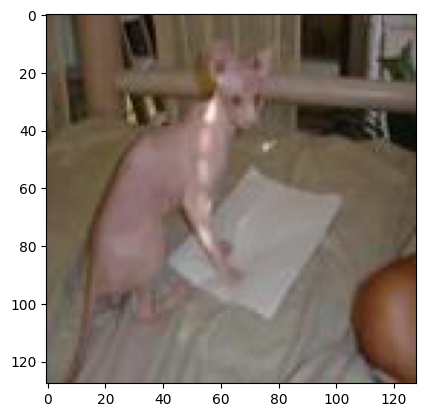

Tamaño de la imagen: (128, 128)


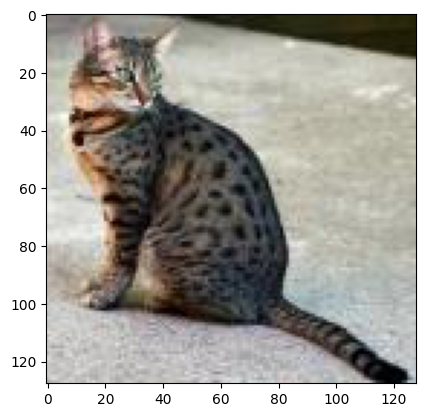

In [8]:
# pon tu código entre aquí

import matplotlib.pyplot as plt
from PIL import Image

# Definir la ruta a la carpeta de gatos de entrenamiento
path_to_train_cats = '/content/drive/MyDrive/ciencia_de_los_datos/2022-2023/Aprendizaje_automatico/Pec4/cats_and_dogs/train/cats'

# Obtener los nombres de los primeros 5 archivos de imagen
image_files = os.listdir(path_to_train_cats)[:5]

# Leer y mostrar cada imagen
for image_file in image_files:
    image_path = os.path.join(path_to_train_cats, image_file)
    image = Image.open(image_path)
    print(f"Tamaño de la imagen: {image.size}")
    plt.imshow(image)
    plt.show()
# y aquí

**c) Explica cómo utilizarías las diversas carpetas proporcionadas a los datos para entrenar y validar que los modelos entrenados funcionan correctamente.**

% pon tu respuesta entre aquí


En un proyecto de aprendizaje automático o aprendizaje profundo, generalmente dividimos los datos en tres conjuntos:

1. **Entrenamiento**: Este conjunto se utiliza para entrenar el modelo, es decir, ajustar los pesos de la red neuronal.

2. **Validación**: Este conjunto se utiliza para ajustar los hiperparámetros del modelo, como la tasa de aprendizaje o el número de capas en la red neuronal. El conjunto de validación nos permite verificar cómo está aprendiendo nuestro modelo durante el entrenamiento sin "espiar" los datos de prueba.

3. **Prueba**: Este conjunto se utiliza para evaluar el rendimiento del modelo después de que ha sido entrenado. Es importante no utilizar este conjunto durante el proceso de entrenamiento para evitar el sobreajuste.

En el caso del dataset proporcionado, ya se nos ha proporcionado una división en conjuntos de entrenamiento, validación y prueba. Las carpetas "train" contienen las imágenes que usaremos para entrenar nuestros modelos, las carpetas "val" contienen las imágenes que usaremos para ajustar nuestros modelos durante el entrenamiento, y las carpetas "test" contienen las imágenes que usaremos para evaluar nuestros modelos después de entrenarlos.



% y aquí

## EJERCICIO 2: Generar el dataset para leer las imágenes de disco

**a) Genera el código necesario para leer los datos de disco con un dataset. Para ello puedes utilizar la misma estrategia que [el notebook de ejemplo](https://gitlab.uoclabs.uoc.es/aprenentatge_automatic/aprenentatge_automatic/-/blob/master/5_neural_networks_examples/02_CNN_Transfer_Learning.ipynb). Crea una función llamada create_dataset con los siguientes parámetros:**



```
   create_dataset(input_folder, image_size, batch_size=32, shuffle=True)
```

dónde:


* input_folder es el directorio donde leer las imágenes
* image_size es el tamaño deseado por las imágenes del dataset
* batch_size es el número de imágenes que serán utilizadas en cada batch durante el entrenamiento

In [9]:
# pon tu código entre aquí
from tensorflow.keras.preprocessing import image_dataset_from_directory

def create_dataset(input_folder, image_size, batch_size=32, shuffle=True):
    return image_dataset_from_directory(
        directory=input_folder,
        shuffle=shuffle,
        batch_size=batch_size,
        image_size=image_size
    )

# y aquí

**b) Utiliza la función para generar los datasets de train y validation. Una vez hecho, lee algunas imágenes del dataset de train. Utiliza el tamaño de las imágenes originales**

Found 504 files belonging to 2 classes.
Found 288 files belonging to 2 classes.


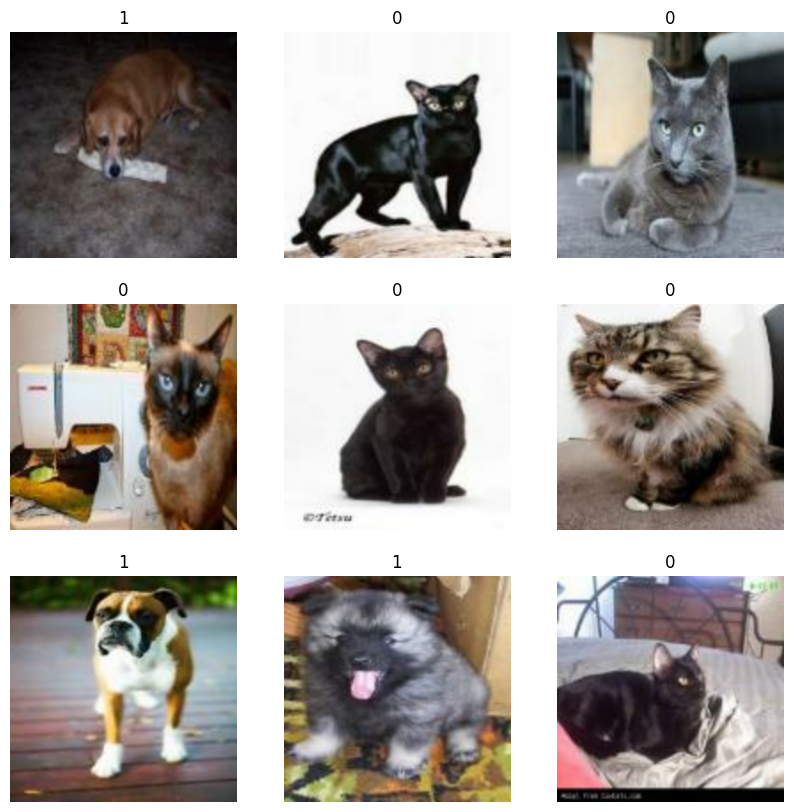

In [10]:
# pon tu código entre aquí
train_dir = '/content/drive/MyDrive/ciencia_de_los_datos/2022-2023/Aprendizaje_automatico/Pec4/cats_and_dogs/train'
val_dir = '/content/drive/MyDrive/ciencia_de_los_datos/2022-2023/Aprendizaje_automatico/Pec4/cats_and_dogs/val'

train_ds = create_dataset(train_dir, image_size=(256, 256))
val_ds = create_dataset(val_dir, image_size=(256, 256))

# Visualizando algunas imágenes
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(int(labels[i]))
    plt.axis("off")


# y aquí

## EJERCICIO 3: Entrenar una red neuronal con la estrategia de transfer learning en un caso binario

**Utilizaremos el notebook de [transfer learning](https://gitlab.uoclabs.uoc.es/aprenentatge_automatic/aprenentatge_automatic/-/blob/master/5_neural_networks_examples/02_CNN_Transfer_Learning.ipynb) como referencia para entrenar una red neuronal. En este caso queremos trabajar con un backone [Mobilenet](https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet/MobileNet)**

**a) Creación del modelo. Pasos a realizar:**
  - Utiliza el preprocesado de los datos necesario por MobileNet
  - Crea un data augmentation donde las imágenes se giren horizontalmente
  - Utiliza un modelo MobileNet como backbone, preentrenados a imagen
  - Crea una neurona de salida para predecir entre las dos clases

In [11]:
# pon tu código entre aquí
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

# Configura la capa de preprocesamiento de MobileNet
preprocess_input = preprocessing.Rescaling(1./127.5, offset=-1) # scale pixels to [-1,1] range

# Configura la capa de aumentación de datos
data_augmentation = Sequential([
  preprocessing.RandomFlip("horizontal"),
])

# Carga la arquitectura MobileNet con los pesos preentrenados en ImageNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Congela los pesos del modelo base para no actualizarlos durante el entrenamiento
base_model.trainable = False

# Crea el modelo final añadiendo nuevas capas sobre el modelo base
model = Sequential([
  data_augmentation,
  preprocess_input,
  base_model,
  GlobalAveragePooling2D(),
  Dropout(0.2),
  Dense(1, activation='sigmoid')
])


17225924/17225924 [==============================] - 2s 0us/step


**b) Entrenamiento del modelo. Configuración deseada:**


*   Learning rate 0.001
*   Optimizador: SGD
*   Epochs: 20



In [12]:
# pon tu código entre aquí
from tensorflow.keras.optimizers import SGD

# Compila el modelo
model.compile(optimizer=SGD(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entrena el modelo
history = model.fit(train_ds, validation_data=val_ds, epochs=20)


Epoch 1/20
16/16 [==============================] - 125s 8s/step - loss: 0.6110 - accuracy: 0.7063 - val_loss: 0.3941 - val_accuracy: 0.8438
Epoch 2/20
16/16 [==============================] - 3s 156ms/step - loss: 0.3674 - accuracy: 0.8730 - val_loss: 0.2888 - val_accuracy: 0.9201
Epoch 3/20
16/16 [==============================] - 2s 120ms/step - loss: 0.2878 - accuracy: 0.9087 - val_loss: 0.2542 - val_accuracy: 0.9028
Epoch 4/20
16/16 [==============================] - 2s 117ms/step - loss: 0.2283 - accuracy: 0.9345 - val_loss: 0.2270 - val_accuracy: 0.9236
Epoch 5/20
16/16 [==============================] - 2s 113ms/step - loss: 0.1951 - accuracy: 0.9484 - val_loss: 0.1969 - val_accuracy: 0.9375
Epoch 6/20
16/16 [==============================] - 3s 142ms/step - loss: 0.1837 - accuracy: 0.9405 - val_loss: 0.1820 - val_accuracy: 0.9549
Epoch 7/20
16/16 [==============================] - 2s 114ms/step - loss: 0.1600 - accuracy: 0.9425 - val_loss: 0.1721 - val_accuracy: 0.9514
Epoch 8

In [13]:

# y aquí

**c) Haz una función para realizar las gráficas de la evolución de la loss y la accuracy en cada batch. Debe tener la cabecera:**



```
def plot_loss_and_accuracy(history):
```

donde history es la salida de la función model.fit utilizada para entrenar el modelo.


Utiliza la función para hacer el plote del modelo entrenado


In [14]:
# pon tu código entre aquí
import matplotlib.pyplot as plt

def plot_loss_and_accuracy(history):
    # Graficando la pérdida en el entrenamiento y en la validación
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Graficando la precisión en el entrenamiento y en la validación
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.tight_layout()
    plt.show()


# y aquí

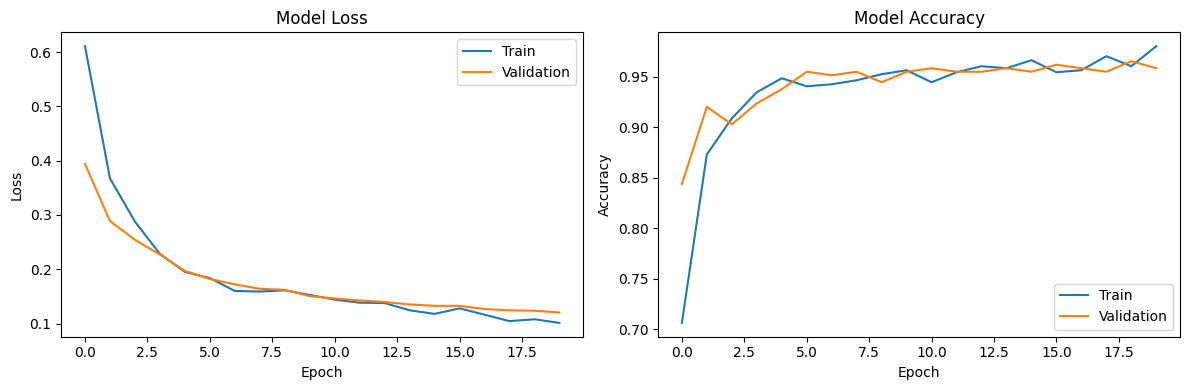

In [15]:
plot_loss_and_accuracy(history)


**d) Analiza el resultado del entrenamiento. ¿La red utilizada sirve para realizar predicciones? ¿Estamos sufriendo de overfitting o underfitting?**

## %pon tu respuesta entre aquí

Para responder a estas preguntas, es necesario evaluar las curvas de pérdida y precisión obtenidas durante el entrenamiento y la validación.

1. **¿La red utilizada sirve para realizar predicciones?**
   
   Si durante el entrenamiento, la precisión (accuracy) en el conjunto de validación aumenta con cada época y la pérdida (loss) disminuye, entonces el modelo está aprendiendo correctamente y puede usarse para hacer predicciones. Sin embargo, es importante tener en cuenta que una alta precisión en el conjunto de entrenamiento y validación no garantiza que el modelo se desempeñe bien en datos nuevos e inéditos.

2. **¿Estamos sufriendo de overfitting o underfitting?**
   
   Para responder a esta pregunta, debes comparar las métricas de rendimiento (pérdida y precisión) en los conjuntos de entrenamiento y validación:

   - **Overfitting (sobreajuste)**: Si la pérdida en el conjunto de entrenamiento es mucho menor que en el conjunto de validación, y/o la precisión en el conjunto de entrenamiento es mucho mayor que en el conjunto de validación, entonces el modelo puede estar sobreajustando. El sobreajuste ocurre cuando el modelo aprende tan bien los datos de entrenamiento que no generaliza bien a datos nuevos. En las gráficas, el sobreajuste puede manifestarse como una gran brecha entre las curvas de entrenamiento y validación.

   - **Underfitting (infraajuste)**: Si tanto la pérdida en el conjunto de entrenamiento como en el conjunto de validación son altas, o la precisión en ambos conjuntos es baja, entonces el modelo puede estar infraajustando. El infraajuste ocurre cuando el modelo no aprende bien los datos de entrenamiento. En las gráficas, el infraajuste puede manifestarse como rendimientos similares (y pobres) en el entrenamiento y la validación, o incluso un mejor rendimiento en la validación que en el entrenamiento.

Sin tener las gráficas delante y la evolución de las métricas durante el entrenamiento, es imposible proporcionar una evaluación precisa para tu caso en particular. Te animo a interpretar tus resultados basándote en la información que te he proporcionado.

% y aquí

## EJERCICIO 4: Modifica los parámetros de entrenamiento

**a) El entrenamiento realizado en el ejercicio 3 permite obtener unos resultados satisfactorios. En este ejercicio queremos entrenar la red de nuevo con unos parámetros distintos de:**

* Optimizador. Cambia el SGD por un optimizador diferente
* Learning rate. Prueba varios parámetros de learning rate y quedate con lo mejor
* loss. Cambia la BinaryCrossentropy por otra que pueda funcionar (sin cambiar la red)

El objetivo es encontrar una configuración alternativa que permita entrenar la red. Para poder entrenar el modelo será necesario que crees una función para crear nuevos modelos:



```
modelo_ex4 = generate_model(inputs, outputs)

```

generate_model deberá generar la red con las layers adecuadas

In [16]:
# pon tu código entre aquí
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def generate_model(inputs, outputs):
    base_model = MobileNet(weights='imagenet', include_top=False)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(outputs, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    return model



In [17]:
modelo_ex4 = generate_model(inputs=(256, 256, 3), outputs=2)

modelo_ex4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [18]:
history2 = modelo_ex4.fit(train_ds, epochs=20,
                         validation_data=val_ds)


# y aquí

Epoch 1/20
16/16 [==============================] - 4s 144ms/step - loss: 1.6582 - accuracy: 0.5000 - val_loss: 1.2751 - val_accuracy: 0.4965
Epoch 2/20
16/16 [==============================] - 3s 163ms/step - loss: 1.1777 - accuracy: 0.4683 - val_loss: 0.9236 - val_accuracy: 0.4722
Epoch 3/20
16/16 [==============================] - 2s 114ms/step - loss: 0.9268 - accuracy: 0.4187 - val_loss: 0.8256 - val_accuracy: 0.4340
Epoch 4/20
16/16 [==============================] - 2s 114ms/step - loss: 0.8591 - accuracy: 0.4385 - val_loss: 0.8096 - val_accuracy: 0.4444
Epoch 5/20
16/16 [==============================] - 2s 114ms/step - loss: 0.8353 - accuracy: 0.4484 - val_loss: 0.7921 - val_accuracy: 0.4514
Epoch 6/20
16/16 [==============================] - 2s 123ms/step - loss: 0.8124 - accuracy: 0.4464 - val_loss: 0.7746 - val_accuracy: 0.4861
Epoch 7/20
16/16 [==============================] - 3s 144ms/step - loss: 0.7920 - accuracy: 0.4762 - val_loss: 0.7596 - val_accuracy: 0.4896
Epoch 

**b) Comenta los resultados obtenidos.** Para ello:
* Compara los resultados obtenidos con los del ejercicio 4.
* Explica cuáles son las funciones del optimizador, la learning rate y la loss.
* ¿Existe una única configuración válida al entrenar un modelo de deep learning?

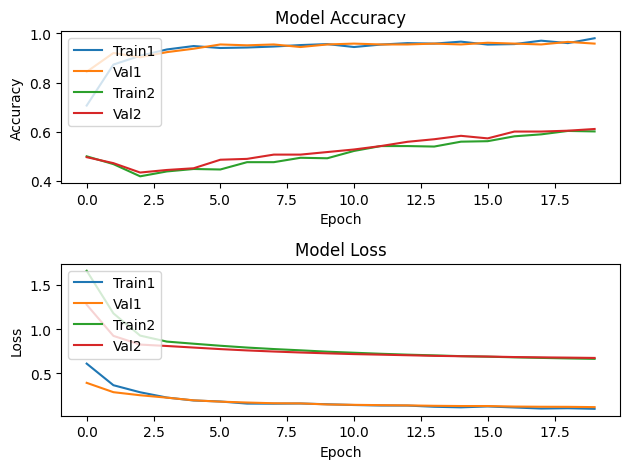

In [19]:
def compare_histories(hist1, hist2):
    fig, axs = plt.subplots(2)

    # summarize history for accuracy
    axs[0].plot(hist1.history['accuracy'])
    axs[0].plot(hist1.history['val_accuracy'])
    axs[0].plot(hist2.history['accuracy'])
    axs[0].plot(hist2.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train1', 'Val1', 'Train2', 'Val2'], loc='upper left')

    # summarize history for loss
    axs[1].plot(hist1.history['loss'])
    axs[1].plot(hist1.history['val_loss'])
    axs[1].plot(hist2.history['loss'])
    axs[1].plot(hist2.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train1', 'Val1', 'Train2', 'Val2'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Compare the histories
compare_histories(history, history2)



% pon tu respuesta entre aquí


% y aquí

## EJERCICIO 5: Entrenamiento con diferentes tamaños de imagen

**a) Entrena la red del ejercicio 3 para varios tamaños de las imágenes. Reduce progresivamente el tamaño de las imágenes y monitoriza cómo evoluciona la accuracy del modelo. Utiliza la función generate_model del ejercicio 4 para ello.**

Entrenando con imágenes de tamaño (256, 256)...
Found 504 files belonging to 2 classes.
Found 288 files belonging to 2 classes.


Epoch 1/20
16/16 [==============================] - 4s 144ms/step - loss: 0.7375 - accuracy: 0.5139 - val_loss: 0.7206 - val_accuracy: 0.5521
Epoch 2/20
16/16 [==============================] - 3s 149ms/step - loss: 0.7060 - accuracy: 0.5476 - val_loss: 0.7172 - val_accuracy: 0.5486
Epoch 3/20
16/16 [==============================] - 3s 124ms/step - loss: 0.7001 - accuracy: 0.5556 - val_loss: 0.7094 - val_accuracy: 0.5625
Epoch 4/20
16/16 [==============================] - 2s 112ms/step - loss: 0.6903 - accuracy: 0.5595 - val_loss: 0.7039 - val_accuracy: 0.5625
Epoch 5/20
16/16 [==============================] - 2s 112ms/step - loss: 0.6822 - accuracy: 0.5694 - val_loss: 0.6995 - val_accuracy: 0.5764
Epoch 6/20
16/16 [==============================] - 2s 113ms/step - loss: 0.6749 - accuracy: 0.5853 - val_loss: 0.6953 - val_accuracy: 0.5868
Epoch 7/20
16/16 [==============================] - 2s 114ms/step - loss: 0.6684 - accuracy: 0.5873 - val_loss: 0.6912 - val_accuracy: 0.5868
Epoch 

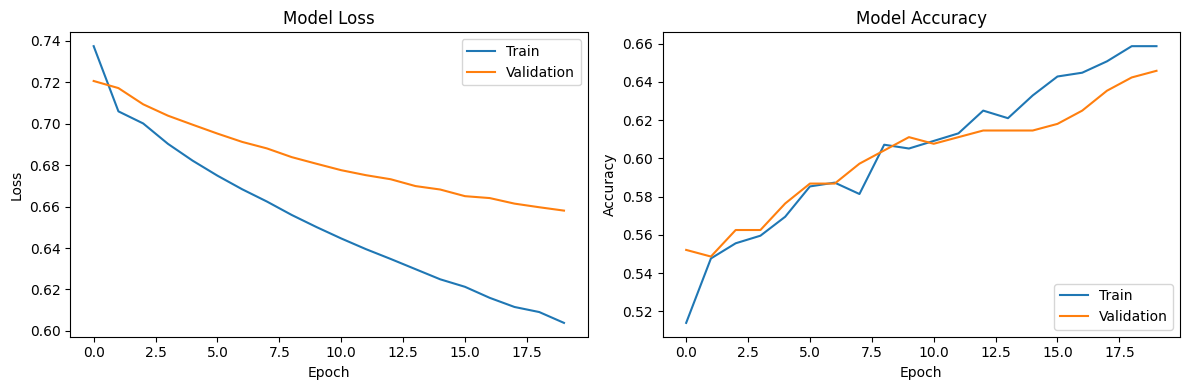

Entrenando con imágenes de tamaño (128, 128)...
Found 504 files belonging to 2 classes.
Found 288 files belonging to 2 classes.


Epoch 1/20
16/16 [==============================] - 4s 114ms/step - loss: 0.9485 - accuracy: 0.4762 - val_loss: 0.9160 - val_accuracy: 0.4722
Epoch 2/20
16/16 [==============================] - 1s 70ms/step - loss: 0.8665 - accuracy: 0.4841 - val_loss: 0.8973 - val_accuracy: 0.4826
Epoch 3/20
16/16 [==============================] - 1s 64ms/step - loss: 0.8395 - accuracy: 0.4921 - val_loss: 0.8744 - val_accuracy: 0.4792
Epoch 4/20
16/16 [==============================] - 1s 55ms/step - loss: 0.8145 - accuracy: 0.5119 - val_loss: 0.8554 - val_accuracy: 0.4965
Epoch 5/20
16/16 [==============================] - 1s 56ms/step - loss: 0.7933 - accuracy: 0.5179 - val_loss: 0.8358 - val_accuracy: 0.5000
Epoch 6/20
16/16 [==============================] - 1s 53ms/step - loss: 0.7715 - accuracy: 0.5337 - val_loss: 0.8201 - val_accuracy: 0.5069
Epoch 7/20
16/16 [==============================] - 1s 56ms/step - loss: 0.7527 - accuracy: 0.5516 - val_loss: 0.8044 - val_accuracy: 0.5243
Epoch 8/20
1

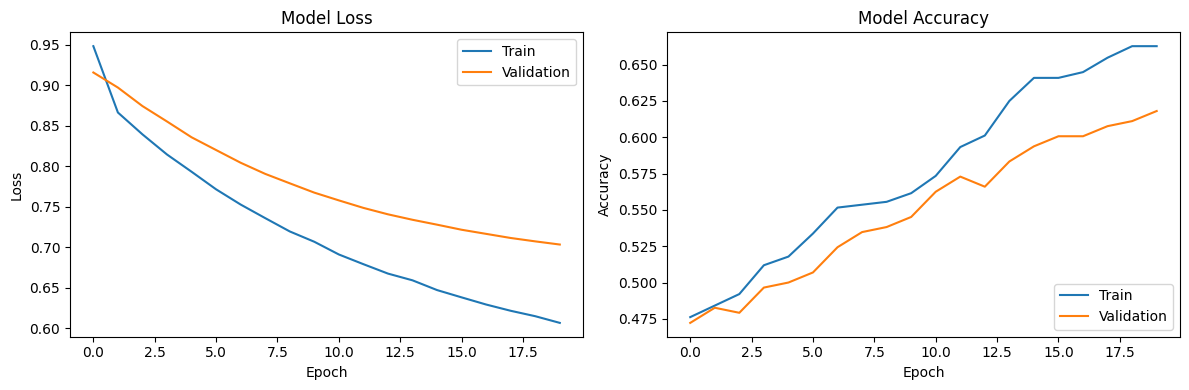

Entrenando con imágenes de tamaño (64, 64)...
Found 504 files belonging to 2 classes.
Found 288 files belonging to 2 classes.


Epoch 1/20
16/16 [==============================] - 4s 93ms/step - loss: 1.1229 - accuracy: 0.4444 - val_loss: 1.0178 - val_accuracy: 0.4722
Epoch 2/20
16/16 [==============================] - 1s 41ms/step - loss: 1.0317 - accuracy: 0.4365 - val_loss: 0.9828 - val_accuracy: 0.4583
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 0.9905 - accuracy: 0.4464 - val_loss: 0.9611 - val_accuracy: 0.4549
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.9554 - accuracy: 0.4623 - val_loss: 0.9420 - val_accuracy: 0.4688
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.9254 - accuracy: 0.4683 - val_loss: 0.9235 - val_accuracy: 0.4792
Epoch 6/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8998 - accuracy: 0.4802 - val_loss: 0.9083 - val_accuracy: 0.4826
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.8744 - accuracy: 0.4980 - val_loss: 0.8945 - val_accuracy: 0.5000
Epoch 8/20
16

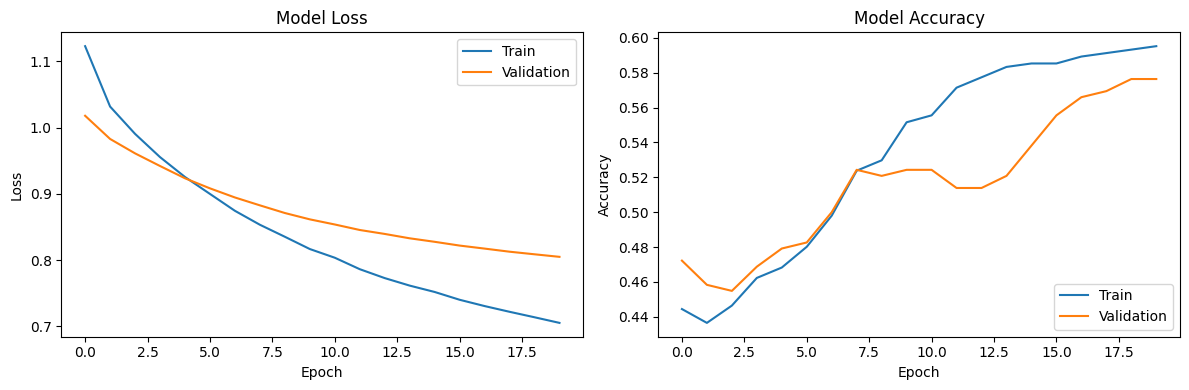

In [20]:
# pon tu código entre aquí
# Definimos los diferentes tamaños de imagen que queremos probar
image_sizes = [(256, 256), (128, 128), (64, 64)]

# Para cada tamaño de imagen, creamos el dataset, generamos el modelo y lo entrenamos
for size in image_sizes:
    print(f"Entrenando con imágenes de tamaño {size}...")
    
    # Creación del dataset
    train_ds = create_dataset(train_dir, image_size=size)
    val_ds = create_dataset(val_dir, image_size=size)

    # Creación del modelo
    model = generate_model(inputs=(size[0], size[1], 3), outputs=2)

    # Configuración del modelo
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    
    # Entrenamiento del modelo
    history = model.fit(train_ds, epochs=20, validation_data=val_ds)
    
    # Gráficas de la evolución de la loss y la accuracy
    plot_loss_and_accuracy(history)


In [ ]:

# y aquí

**b) ¿Qué resultados has obtenido? ¿Es necesario entrenar la red con las imágenes de máxima resolución o con resoluciones menores es suficiente?**


% pon tu respuesta entre aquí


% y aquí

## EJERCICIO 6: Test del modelo con datos nuevos

**a) Una vez entrenado los modelos queremos hacer inferencia con datos nuevos. Utiliza la función model.predict para generar las predicciones del test dataset.** Pasos:
- Crea el test_dataset con la función create_dataset con shuffle=False
- Haz las predicciones del modelo con model.predict. La salida serán valores numéricos (predictions)
- Convierte las predicciones en binarias (predictions_binary). Puedes utilizar [este código](https://androidkt.com/get-class-labels-from-predict-method-in-keras/ )

In [ ]:

# y aquí

In [ ]:
# you can use the following code to see the filenames, outputs of the net and the predictions 
for i in range(len(predictions)):
  print(test_dataset.file_paths[i], predictions[i], predictions_binary[i])



**b) Lee y muestra algunas imágenes mal clasificadas por el modelo**

In [ ]:
# pon tu código entre aquí


In [ ]:
# y aquí

**c) Analiza los resultados obtenidos:**
* ¿Funciona bien con las imágenes de test?
* ¿Qué hace con las imágenes de la categoría other?
* ¿Es normal el comportamiento de la red en este caso?
* ¿Qué podemos decir como conclusión final sobre los datos de train/val/test? ¿Deben ser similares?

% pon tu respuesta entre aquí


% y aquí

## EJERCICIO 7: Más allá de los clasificadores

En este ejercicio no debéis programar. Busca información y reflexiona (partiendo de lo aprendido en los ejercicios anteriores) sobre las preguntas que se formulan.

**a) En el ejercicio anterior hemos visto los efectos de intentar clasificar datos en los que el modelo no ha sido entrenado. ¿Qué harías para extender el modelo de forma que clasificara gatos, perros y caballos?**

% pon tu respuesta entre aquí



% y aquí

**b) Las redes neuronales se pueden utilizar para identificar caras humanas. Es decir, para decidir quién es la persona cuya cara se muestra en una imagen. Esto es también un problema de clasificación y se utiliza en sistemas de seguridad o, recientemente, para permitir el acceso a smartphones.**

**¿Crees que estos sistemas funcionan de forma similar a los que se han implementado en esta práctica? Busca información sobre redes neuronales para reconocimiento facial y reflexiona sobre si son similares o no a las de esta práctica.**

% pon tu respuesta entre aquí



% y aquí